In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [2]:
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 640x480 with 0 Axes>

In [3]:
import lalsimulation as lalsim

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [4]:
import waveform_generator
import pn_taylor_eob

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [5]:
base_dir = "/Users/sebastian.khan/personal/data/NR_COMPARISON_Q1_NS_32_22_MODE"

In [6]:
data = {}
for file in glob.glob(os.path.join(base_dir, "*")):
    code_name = file.split('/')[-1].split('_')[0].split('.')[0]
    sim_name = file.split('/')[-1].split('_')[1].split('.npy')[0]
    data[sim_name] = np.load(file)

In [7]:
data['seobnrv5hm'] = np.load("/Users/sebastian.khan/Downloads/seobnrv5hm_q1ns-phase.npy")

In [8]:
###
# surrogate
import gwsurrogate
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')
# sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
# sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8_CCE')
q = 1
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]
dt = 0.1        # step size, Units of M
# f_low = 5e-3    # initial frequency, Units of cycles/M
# f_low = 1e-2
# f_low = 0.4e-2
f_low = 1e-3
# f_low = 0.006
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

psi0 = 0
# psi0 = np.pi
# psi0 = -np.pi
for k in h.keys():
    h[k] = h[k] * np.exp(1.j*psi0)


data['NRHybSur3dq8'] = np.c_[t, np.unwrap(np.angle(h[2,2])), np.unwrap(np.angle(h[3,2]))]


###

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRHybSur3dq8 model


In [9]:
###
# surrogate
import gwsurrogate
# sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')
# sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
# sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8_CCE')
q = 1
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]
dt = 0.1        # step size, Units of M
f_low = 5e-3    # initial frequency, Units of cycles/M
# f_low = 1e-2
# f_low = 0.4e-2
# f_low = 1e-3
# f_low = 0.006
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

psi0 = 0
# psi0 = np.pi
# psi0 = -np.pi
for k in h.keys():
    h[k] = h[k] * np.exp(1.j*psi0)


data['NRSur7dq4'] = np.c_[t, np.unwrap(np.angle(h[2,2])), np.unwrap(np.angle(h[3,2]))]


###

In [10]:
###
# surrogate
import gwsurrogate
# sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')
# sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8_CCE')
q = 1
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]
dt = 0.1        # step size, Units of M
# f_low = 5e-3    # initial frequency, Units of cycles/M
# f_low = 1e-2
# f_low = 0.4e-2
f_low = 1e-3
# f_low = 0.006
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

psi0 = 0
# psi0 = np.pi
# psi0 = -np.pi
for k in h.keys():
    h[k] = h[k] * np.exp(1.j*psi0)


data['NRHybSur3dq8_CCE'] = np.c_[t, np.unwrap(np.angle(h[2,2])), np.unwrap(np.angle(h[3,2]))]


###

Loaded NRHybSur3dq8_CCE model


In [11]:
f_min=8
wf_pn = pn_taylor_eob.generate_pn_waveform_eob(
    1,
    modes=[(2,2),(3,2)],
    f_min=f_min,
    S1z=0,
    S2z=0
)

data['pn_eob_splice'] = np.c_[
    wf_pn['t'],
    np.unwrap(np.angle(wf_pn['hlm'][2,2])),
    np.unwrap(np.angle(wf_pn['hlm'][3,2])),
]

In [12]:
wf_pn = waveform_generator.generate_pn_waveform(
    q=1,
    modes=[(2,2),(3,2)],
    f_min=f_min,
    S1z=0,
    S2z=0,
    # approximant=lalsim.IMRPhenomTHM
    # approximant=lalsim.NRHybSur3dq8
    # approximant=lalsim.TaylorT1
    approximant=lalsim.SpinTaylorT1
    # approximant=lalsim.SEOBNRv4PHM
)

data['SpinTaylorT1'] = np.c_[
    wf_pn['t'],
    np.unwrap(np.angle(wf_pn['hlm'][2,2])),
    np.unwrap(np.angle(wf_pn['hlm'][3,2])),
]

wf_pn = waveform_generator.generate_pn_waveform(
    q=1,
    modes=[(2,2),(3,2)],
    f_min=f_min,
    S1z=0,
    S2z=0,
    # approximant=lalsim.IMRPhenomTHM
    # approximant=lalsim.NRHybSur3dq8
    approximant=lalsim.TaylorT1
    # approximant=lalsim.SEOBNRv4PHM
)

data['TaylorT1'] = np.c_[
    wf_pn['t'],
    np.unwrap(np.angle(wf_pn['hlm'][2,2])),
    np.unwrap(np.angle(wf_pn['hlm'][3,2])),
]

In [13]:
# wf_pn = waveform_generator.generate_pn_waveform(
#     q=1,
#     modes=[(2,2),(3,2)],
#     f_min=f_min,
#     S1z=0,
#     S2z=0,
#     # approximant=lalsim.IMRPhenomTHM
#     # approximant=lalsim.NRHybSur3dq8
#     # approximant=lalsim.TaylorT1
#     approximant=lalsim.SpinTaylorT4
#     # approximant=lalsim.SEOBNRv4PHM
# )

# data['SpinTaylorT4'] = np.c_[
#     wf_pn['t'],
#     np.unwrap(np.angle(wf_pn['hlm'][2,2])),
#     np.unwrap(np.angle(wf_pn['hlm'][3,2])),
# ]

# wf_pn = waveform_generator.generate_pn_waveform(
#     q=1,
#     modes=[(2,2),(3,2)],
#     f_min=f_min,
#     S1z=0,
#     S2z=0,
#     approximant=lalsim.TaylorT4
# )

# data['TaylorT4'] = np.c_[
#     wf_pn['t'],
#     np.unwrap(np.angle(wf_pn['hlm'][2,2])),
#     np.unwrap(np.angle(wf_pn['hlm'][3,2])),
# ]

In [14]:
# shift phase
for k in data.keys():
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]

    phi22_ref = IUS(t, phi22)(0)
    phi_orb_ref = phi22_ref/2

    phi22 -= 2*phi_orb_ref
    phi32 -= 2*phi_orb_ref

    data[k][:,1] = phi22
    data[k][:,2] = phi32

In [15]:
data.keys()

dict_keys(['SXS:BBH:0072', 'SXS:BBH:0066', 'SXS:BBH:1153', 'SXS:BBH:0067', 'ExtrapStrain-RIT-BBH-0198-n140', 'SXS:BBH:0071', 'SXS:BBH:0070', 'ExtrapStrain-RIT-BBH-0001-n100', 'SXS:BBH:1154', 'MAYA1015', 'SXS:BBH:1155', 'SXS:BBH:1132', 'SXS:BBH:0002', 'SXS:BBH:0389', 'ExtrapStrain-RIT-BBH-0112-n100', 'GT0448', 'SXS:BBH:0001', 'R6-PN-80', 'SXS:BBH:0180', 'GT0905', 'MAYA0926', 'SXS:BBH:0090', 'MAYA0927', 'SXS:BBH:0086', 'MAYA0922', 'seobnrv5hm', 'NRHybSur3dq8', 'NRSur7dq4', 'NRHybSur3dq8_CCE', 'pn_eob_splice', 'SpinTaylorT1', 'TaylorT1'])

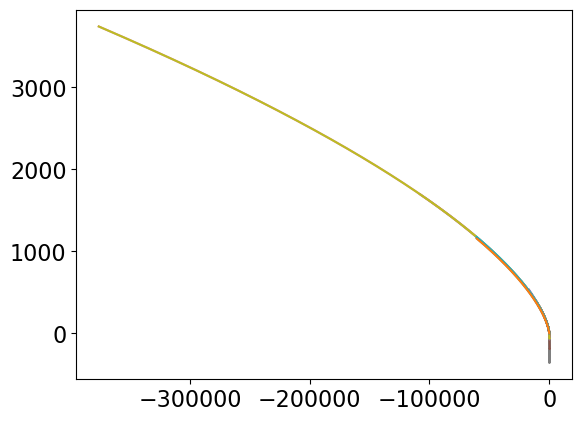

In [16]:
plt.figure()
for k in data.keys():
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    plt.plot(t, phi32)

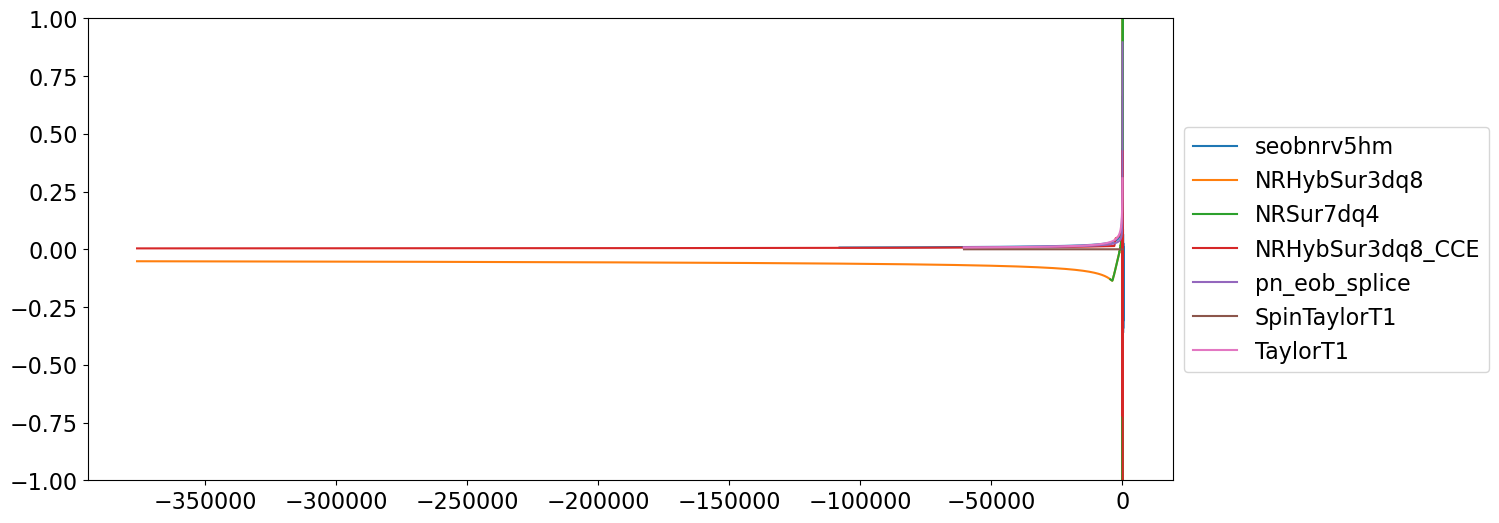

In [17]:
plt.figure(figsize=(14, 6))
for k in data.keys():
    if 'SXS' in k:
        continue
    if 'RIT' in k:
        continue
    if 'R6' in k:
        continue
    if 'MAYA' in k:
        continue
    if 'GT' in k:
        continue
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    plt.plot(t, delta_phi, label=k)
plt.ylim(-1,1)
# plt.xlim(-10000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

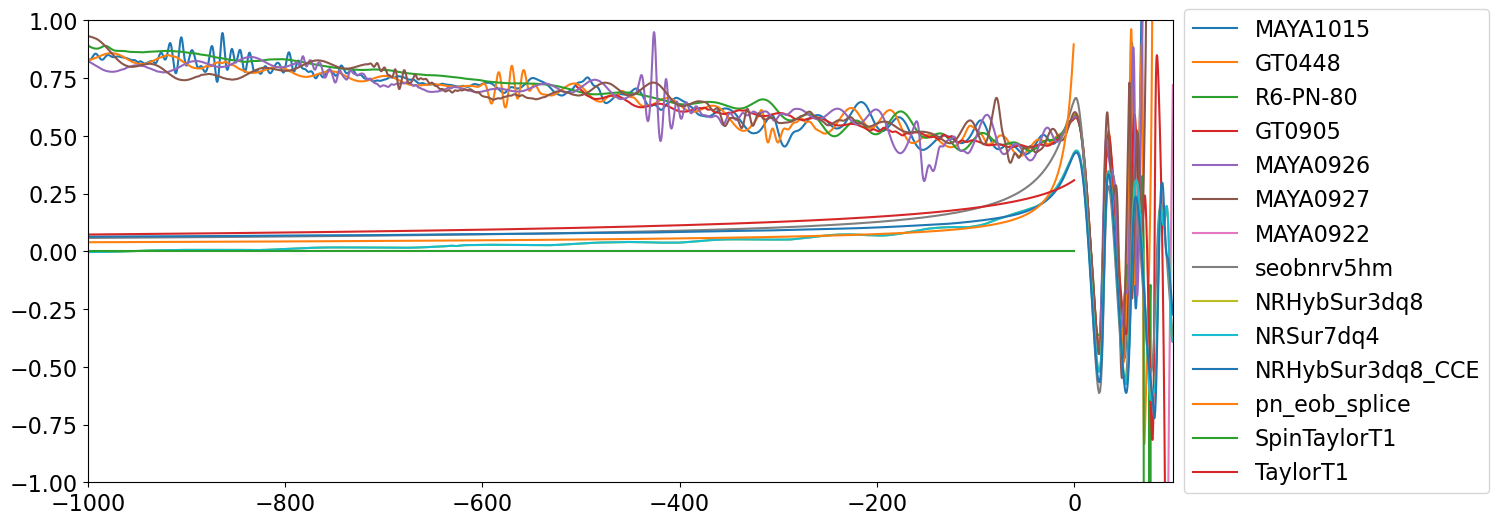

In [18]:
plt.figure(figsize=(14, 6))
for k in data.keys():
    if 'SXS' in k:
        continue
    if 'RIT' in k:
        continue
    # if 'R6' in k:
    #     continue
    # if 'MAYA' in k:
    #     continue
    # if 'GT' in k:
    #     continue
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    plt.plot(t, delta_phi, label=k)
plt.ylim(-1,1)
plt.xlim(-1000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

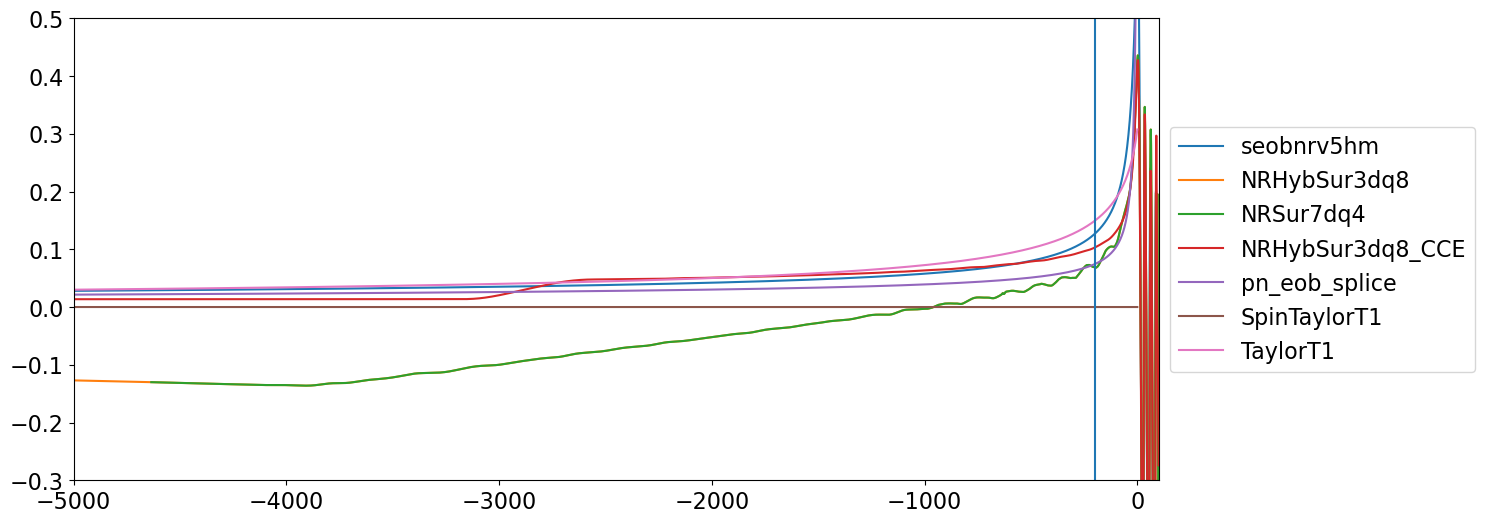

In [19]:
plt.figure(figsize=(14, 6))
for k in data.keys():
    if 'SXS' in k:
        continue
    if 'RIT' in k:
        continue
    if 'R6' in k:
        continue
    if 'MAYA' in k:
        continue
    if 'GT' in k:
        continue
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    if k == 'SXS:BBH:0090':
        # polarisaiton fix
        delta_phi -= 2*np.pi
    plt.plot(t, delta_phi, label=k)
# plt.ylim(-1,1)
plt.ylim(-0.3, 0.5)
# plt.xlim(-10000, 100)
# plt.xlim(-20000, 100)
plt.xlim(-5000, 100)
plt.axvline(-200)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

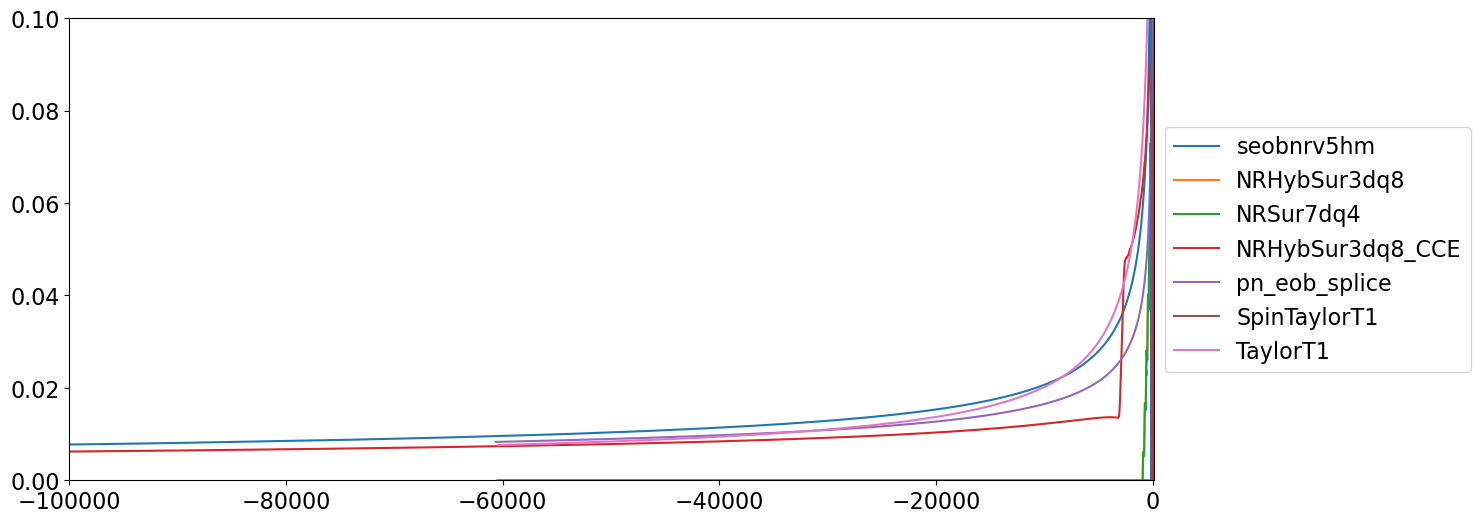

In [20]:
plt.figure(figsize=(14, 6))
for k in data.keys():
    if 'SXS' in k:
        continue
    if 'RIT' in k:
        continue
    if 'R6' in k:
        continue
    if 'MAYA' in k:
        continue
    if 'GT' in k:
        continue
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    if k == 'SXS:BBH:0090':
        # polarisaiton fix
        delta_phi -= 2*np.pi
    plt.plot(t, delta_phi, label=k)
# plt.ylim(-1,1)
# plt.ylim(-0.3, 0.5)
plt.ylim(0, 0.1)
# plt.xlim(-10000, 100)
plt.xlim(-100000, 100)
# plt.xlim(-5000, 100)
plt.axvline(-200)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, '$\\phi_{32} - \\phi_{22}$')

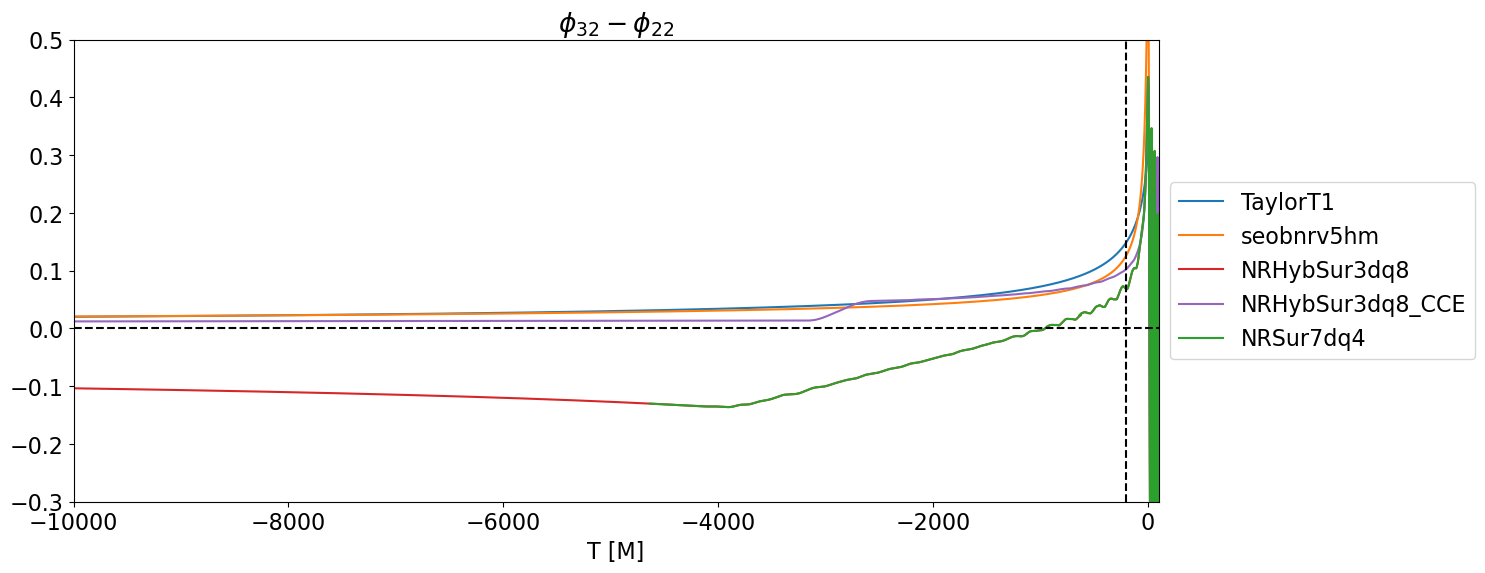

In [21]:
# colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRSur7dq4':'C2', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4', 'R6-PN-80':'C5'}
colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4', 'NRSur7dq4':'C2'}
plt.figure(figsize=(14, 6))
for k in colors.keys():
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    if k == 'SXS:BBH:0090':
        # polarisaiton fix
        delta_phi -= 2*np.pi
    plt.plot(t, delta_phi, label=k, color=colors[k])
# plt.ylim(-1,1)
plt.ylim(-0.3, 0.5)
# plt.xlim(-10000, 100)
# plt.xlim(-20000, 100)
plt.xlim(-10000, 100)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axhline(0, c='k', ls='--')
plt.axvline(-200, c='k', ls='--')
plt.xlabel('T [M]')
plt.title(r'$\phi_{32} - \phi_{22}$')

Text(0.5, 1.0, '$\\phi_{32} - \\phi_{22}$')

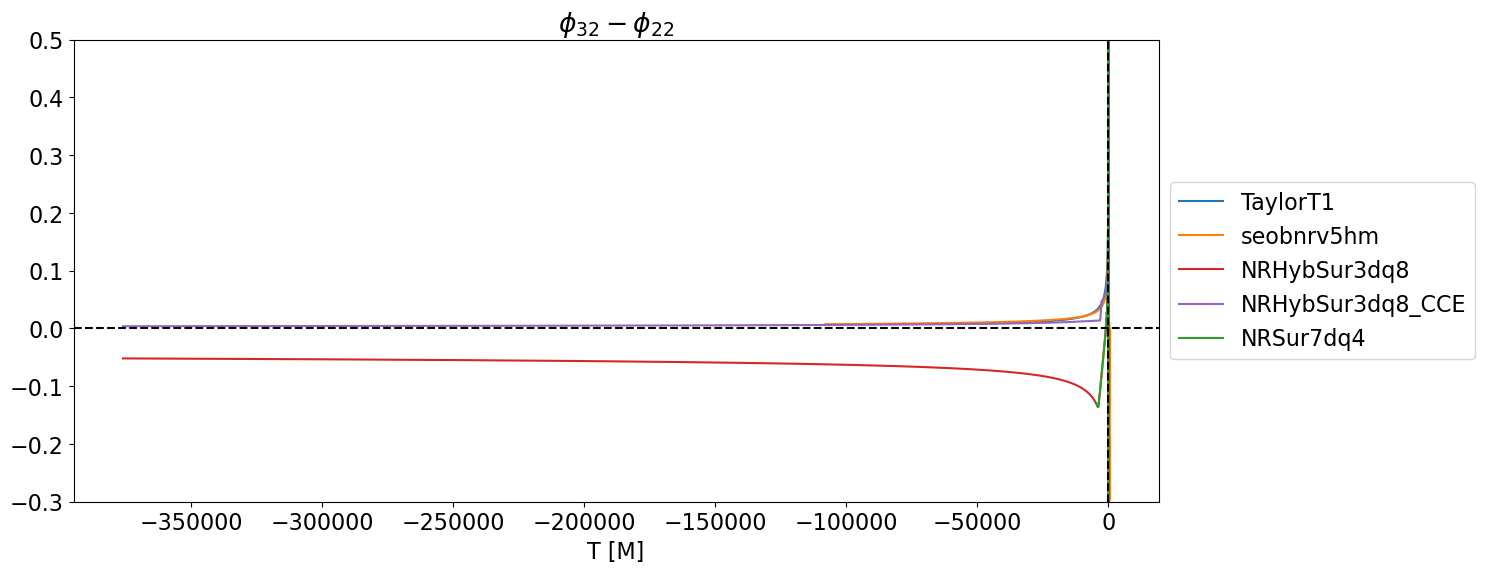

In [22]:
# colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRSur7dq4':'C2', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4', 'R6-PN-80':'C5'}
colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4', 'NRSur7dq4':'C2'}
plt.figure(figsize=(14, 6))
for k in colors.keys():
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    if k == 'SXS:BBH:0090':
        # polarisaiton fix
        delta_phi -= 2*np.pi
    plt.plot(t, delta_phi, label=k, color=colors[k])
# plt.ylim(-1,1)
plt.ylim(-0.3, 0.5)
# plt.xlim(-10000, 100)
# plt.xlim(-20000, 100)
# plt.xlim(-10000, 100)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axhline(0, c='k', ls='--')
plt.axvline(-200, c='k', ls='--')
plt.xlabel('T [M]')
plt.title(r'$\phi_{32} - \phi_{22}$')

In [23]:
colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4', 'NRSur7dq4':'C2', 'R6-PN-80':'C5', 'GT0448':'C6'}
# colors = {'TaylorT1':'C0', 'seobnrv5hm':'C1', 'NRSur7dq4':'C2', 'NRHybSur3dq8':'C3', 'NRHybSur3dq8_CCE':'C4'}
plt.figure(figsize=(14, 6))
for k in colors.keys():
    t = data[k][:,0]
    phi22 = data[k][:,1]
    phi32 = data[k][:,2]
    delta_phi = phi32-phi22
    if k == 'SXS:BBH:0090':
        # polarisaiton fix
        delta_phi -= 2*np.pi
    plt.plot(t, delta_phi, label=k, color=colors[k])
# plt.ylim(-1,1)
plt.ylim(-0.3, 1.5)
# plt.xlim(-10000, 100)
# plt.xlim(-20000, 100)
plt.xlim(-10000, 100)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axhline(0, c='k', ls='--')
plt.axvline(-200, c='k', ls='--')
plt.xlabel('T [M]')
plt.title(r'$\phi_{32} - \phi_{22}$')

Text(0.5, 1.0, '$\\phi_{32} - \\phi_{22}$')